Import Libraries:

In [103]:
%matplotlib inline
from sklearn.model_selection import train_test_split
import numpy as np
import qutip as qt
from vae import * 

In [116]:
batch_size = 64
learning_rate = 0.0001
lat_dim = 2
hidden_act = "tanh"
final_act = "linear"

Noiseless  
0 Beta 
0.75 Beta 
0 0.1 0.5 Decoherence factor 

Noisy 
0 Beta 
0.75 Beta 
0 0.1 0.5 Decoherence factor 

# Noiseless 0.0 Deco 0.00 Beta

790/790 [==============================] - 1s 591us/step


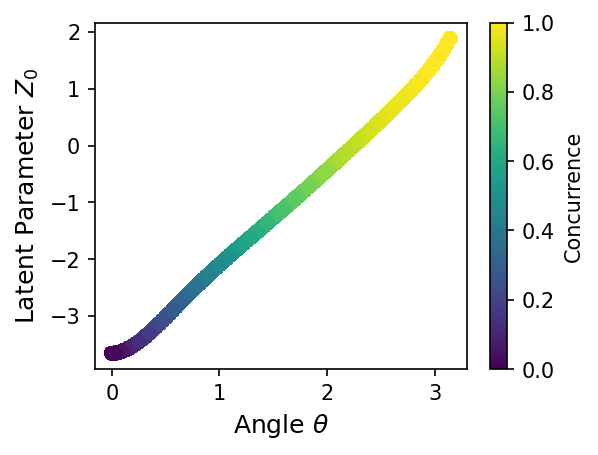

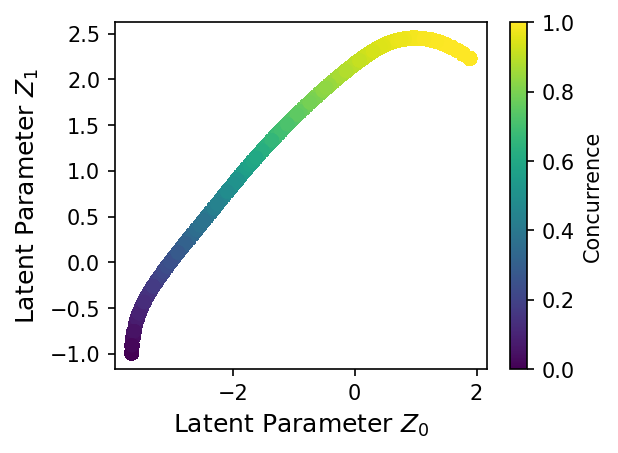

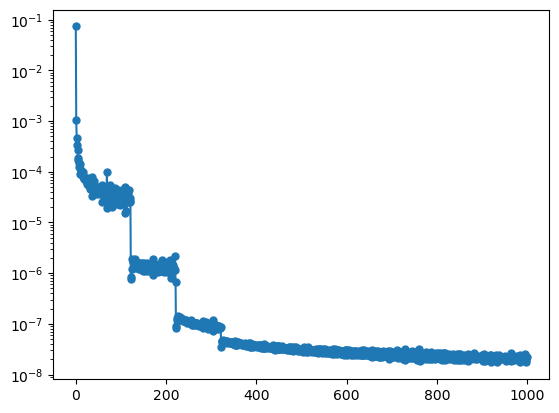

In [119]:
n_angle = 101
n_samples = 1000
beta = 0.0
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_no_00.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)

concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/deco/encoder_deco00_lat2_beta00_no.h5")
decoder.load_weights("/home/felix/Downloads/deco/decoder_deco00_lat2_beta00_no.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
temp_hist = vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

read_dictionary = np.load('/home/felix/Downloads/deco/history_deco00_lat2_beta00_no.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noiseless 0.1 Deco 0.00 Beta

790/790 [==============================] - 1s 620us/step


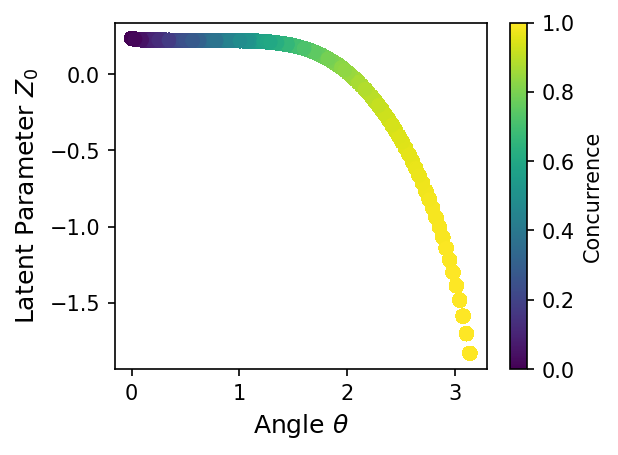

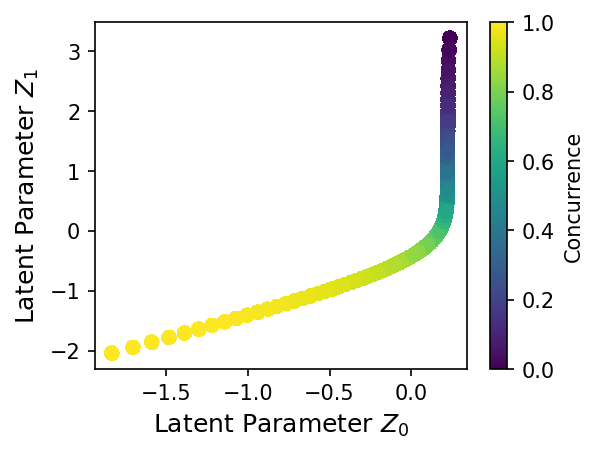

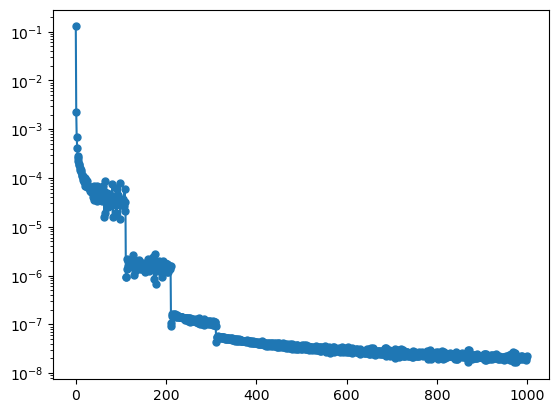

In [120]:
n_angle = 101
n_samples = 1000
beta = 0.00
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_no_01.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)


concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/deco/encoder_deco01_lat2_beta00_no.h5")
decoder.load_weights("/home/felix/Downloads/deco/decoder_deco01_lat2_beta00_no.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

read_dictionary = np.load('/home/felix/Downloads/deco/history_deco01_lat2_beta00_no.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noiseless 0.5 Deco 0.00 Beta

790/790 [==============================] - 1s 642us/step


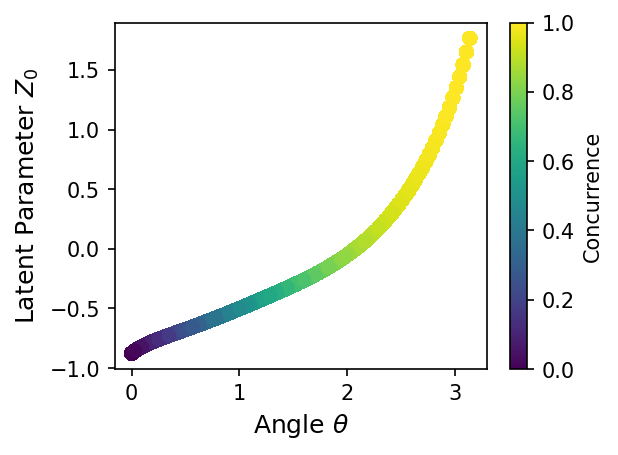

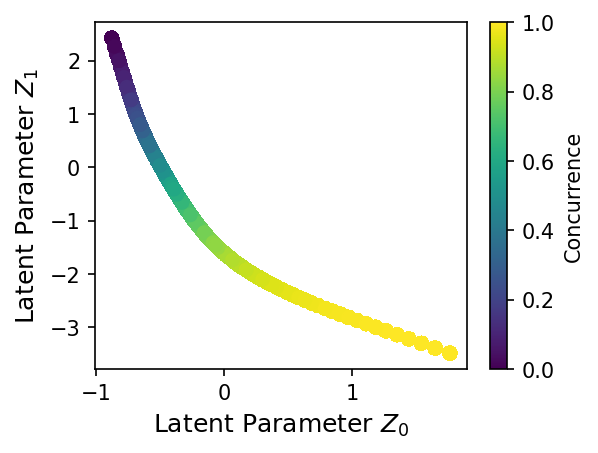

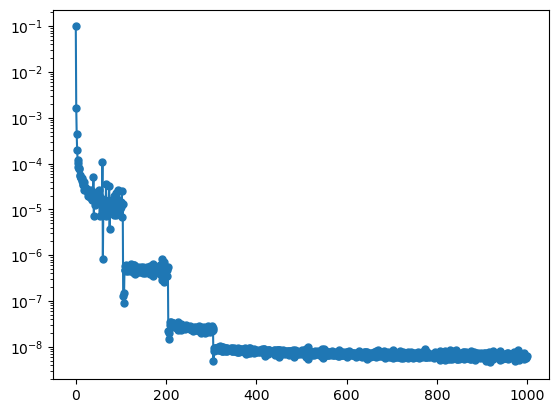

In [121]:
n_angle = 101
n_samples = 1000
beta = 0.00
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_no_05.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)

concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/deco/encoder_deco05_lat2_beta00_no.h5")
decoder.load_weights("/home/felix/Downloads/deco/decoder_deco05_lat2_beta00_no.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

read_dictionary = np.load('/home/felix/Downloads/deco/history_deco05_lat2_beta00_no.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noiseless 0.0 Deco 0.75 Beta

790/790 [==============================] - 0s 517us/step


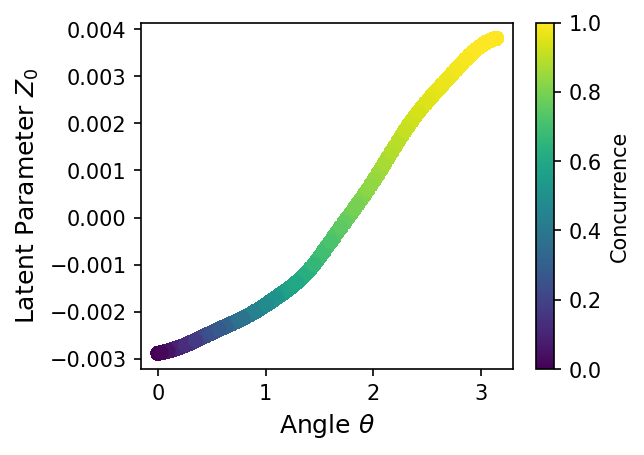

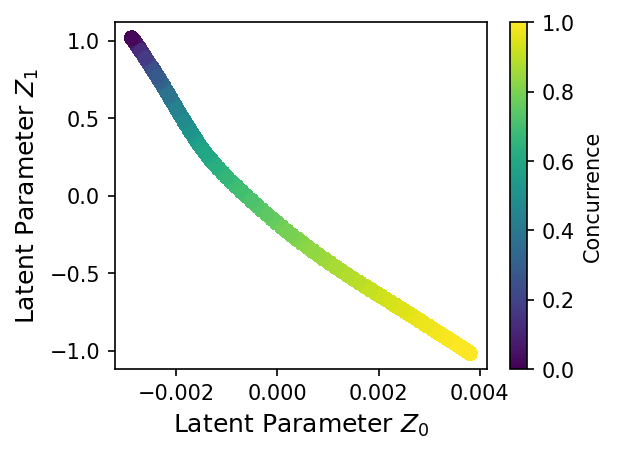

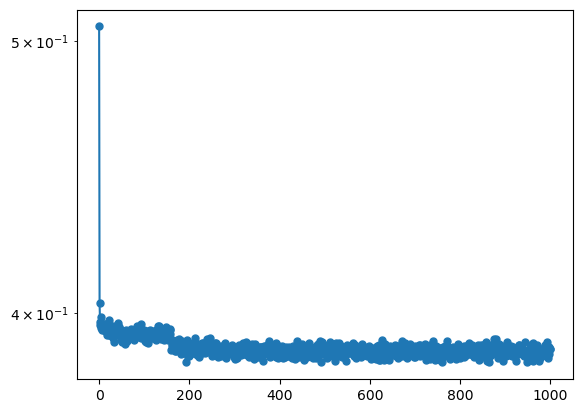

In [123]:
n_angle = 101
n_samples = 1000
beta = 0.75
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_no_00.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)


concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/deco/encoder_deco00_lat2_beta75_no.h5")
decoder.load_weights("/home/felix/Downloads/deco/decoder_deco00_lat2_beta75_no.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

read_dictionary = np.load('/home/felix/Downloads/deco/history_deco00_lat2_beta75_no.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noiseless 0.1 Deco 0.75 Beta

790/790 [==============================] - 1s 577us/step


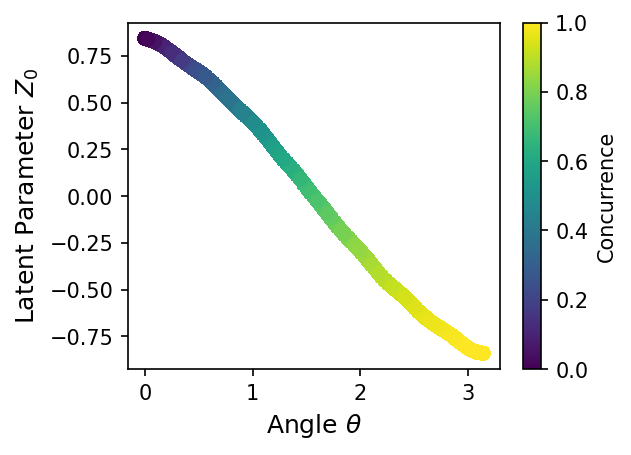

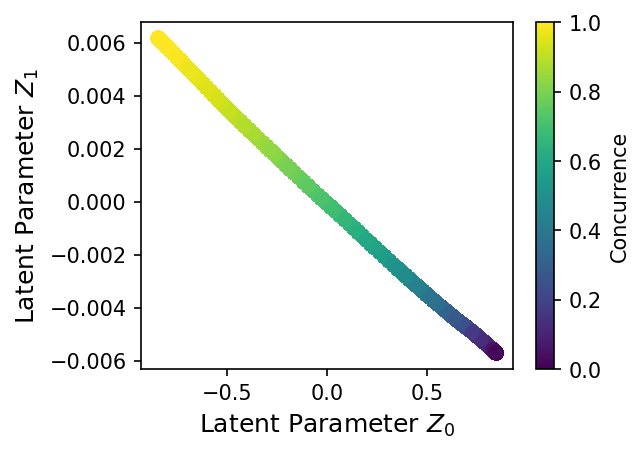

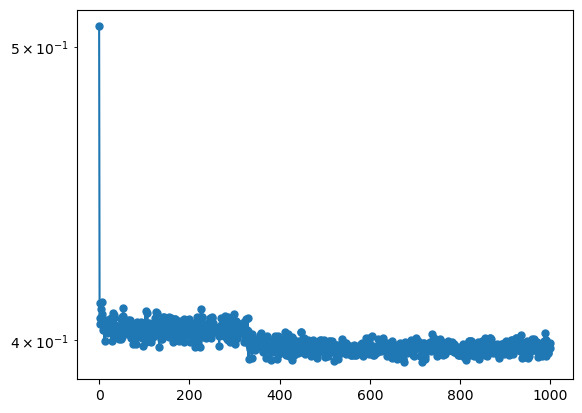

In [124]:
n_angle = 101
n_samples = 1000
beta = 0.75
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_no_01.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)


concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/deco/encoder_deco01_lat2_beta75_no.h5")
decoder.load_weights("/home/felix/Downloads/deco/decoder_deco01_lat2_beta75_no.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

read_dictionary = np.load('/home/felix/Downloads/deco/history_deco01_lat2_beta75_no.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noiseless 0.5 Deco 0.75 Beta

790/790 [==============================] - 0s 528us/step


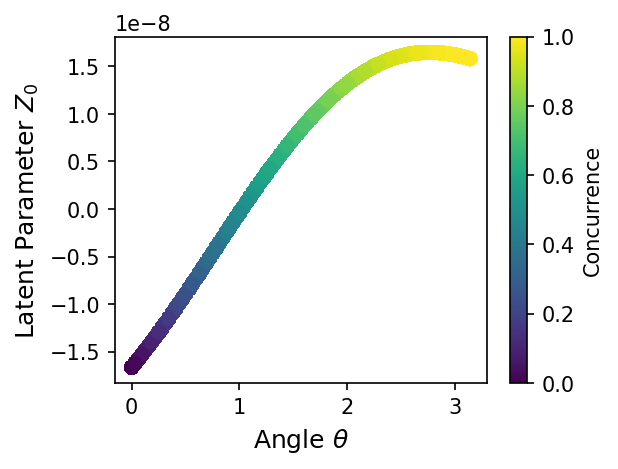

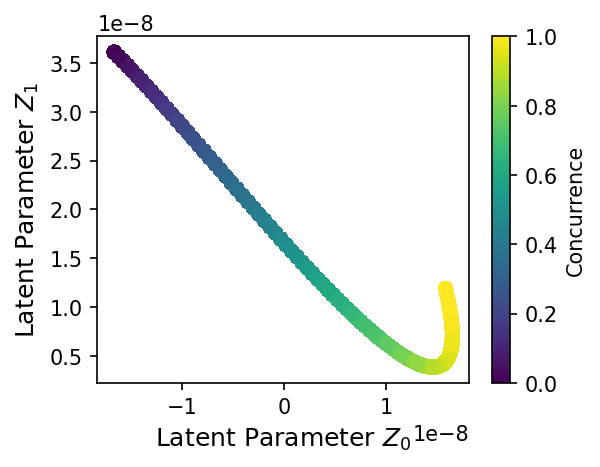

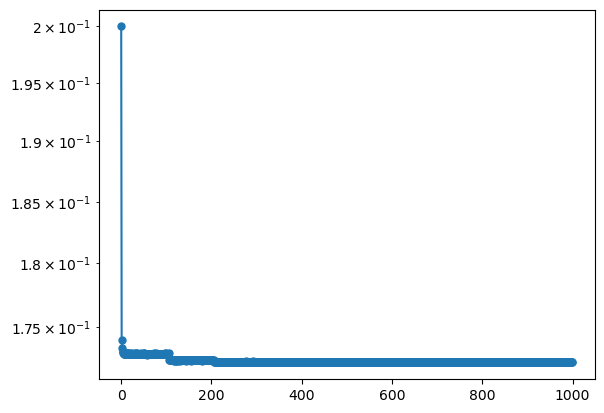

In [125]:
n_angle = 101
n_samples = 1000
beta = 0.75
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_no_05.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)


concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/deco/encoder_deco05_lat2_beta75_no.h5")
decoder.load_weights("/home/felix/Downloads/deco/decoder_deco05_lat2_beta75_no.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

read_dictionary = np.load('/home/felix/Downloads/deco/history_deco05_lat2_beta75_no.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noise 0.0 Deco 0.0 Beta

790/790 [==============================] - 0s 551us/step


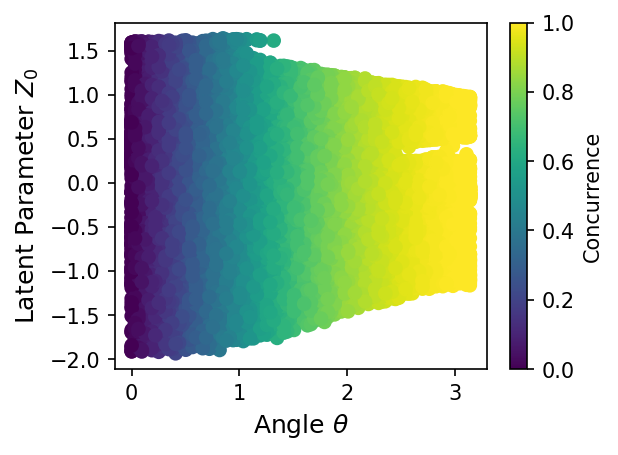

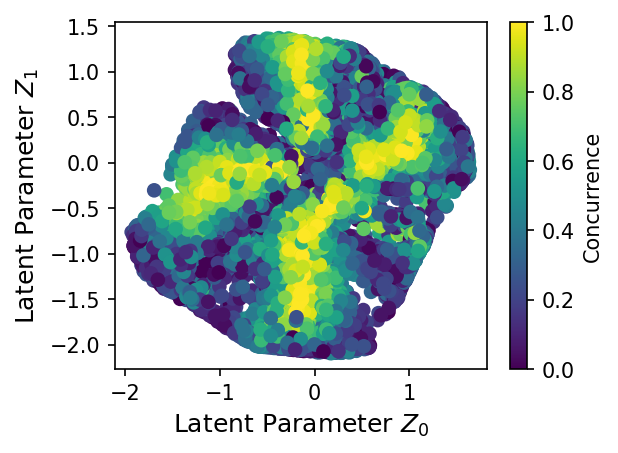

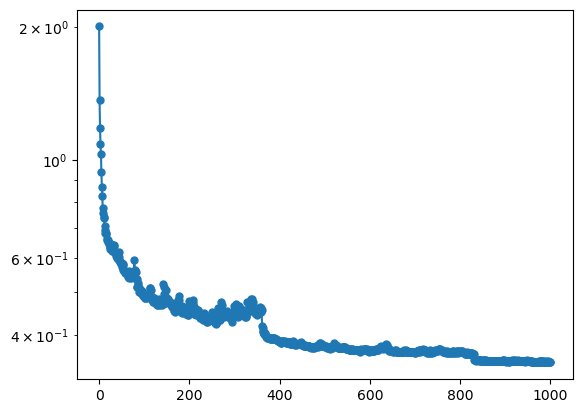

In [126]:
n_angle = 101
n_samples = 1000
beta = 0.00
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_noise_00.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)

concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/deco/encoder_deco00_lat2_beta00_noise.h5")
decoder.load_weights("/home/felix/Downloads/deco/decoder_deco00_lat2_beta00_noise.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

read_dictionary = np.load('/home/felix/Downloads/deco/history_deco00_lat2_beta00_noise.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noise 0.1 Deco 0.0 Beta

790/790 [==============================] - 0s 522us/step


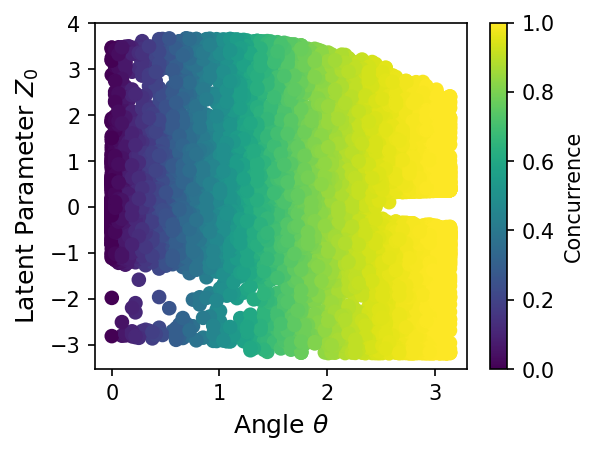

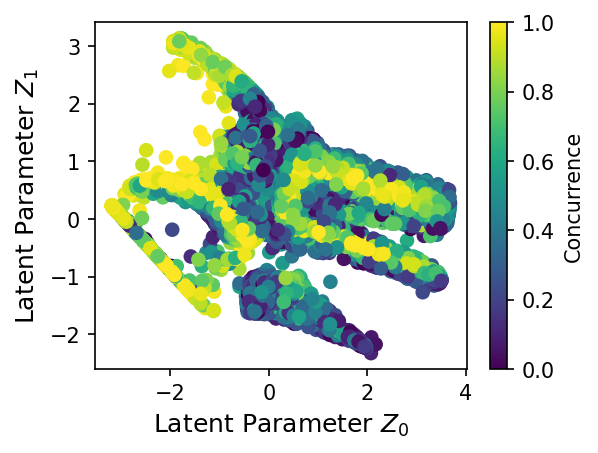

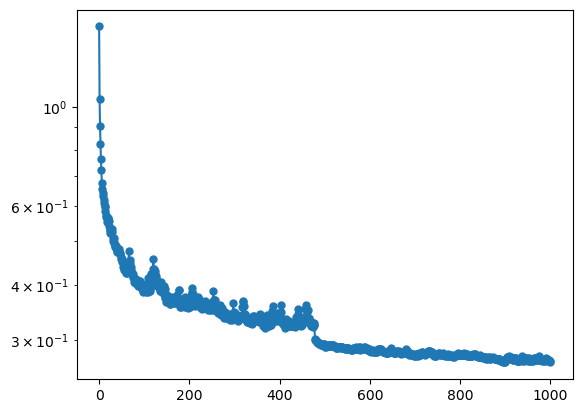

In [127]:
n_angle = 101
n_samples = 1000
beta = 0.00
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_noise_01.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)

concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/deco/encoder_deco01_lat2_beta00_noise.h5")
decoder.load_weights("/home/felix/Downloads/deco/decoder_deco01_lat2_beta00_noise.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

read_dictionary = np.load('/home/felix/Downloads/deco/history_deco01_lat2_beta00_noise.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noise 0.5 Deco 0.0 Beta

790/790 [==============================] - 0s 516us/step


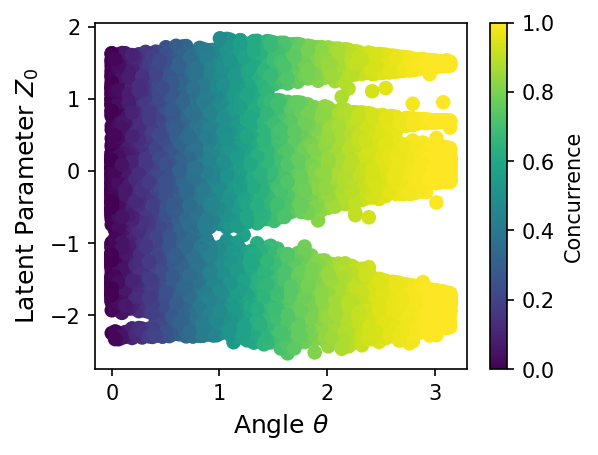

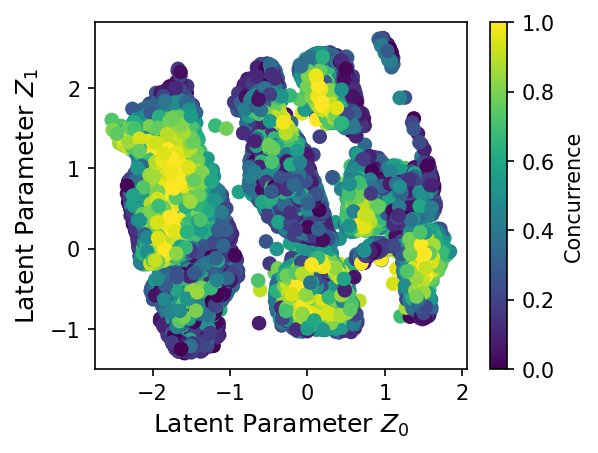

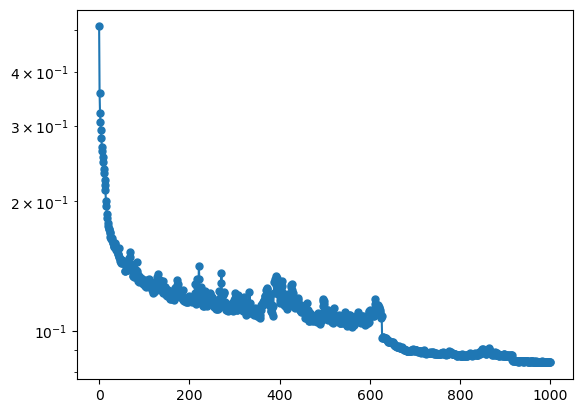

In [128]:
n_angle = 101
n_samples = 1000
beta = 0.00
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_noise_05.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)

concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/deco/encoder_deco05_lat2_beta00_noise.h5")
decoder.load_weights("/home/felix/Downloads/deco/decoder_deco05_lat2_beta00_noise.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

read_dictionary = np.load('/home/felix/Downloads/deco/history_deco05_lat2_beta00_noise.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noise 0.0 Deco 0.75 Beta

790/790 [==============================] - 0s 503us/step


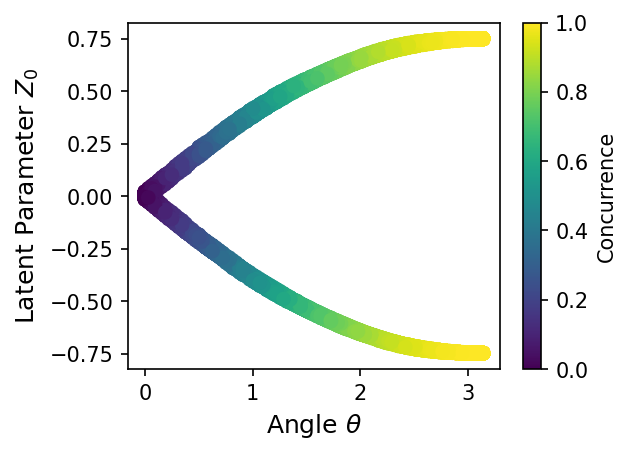

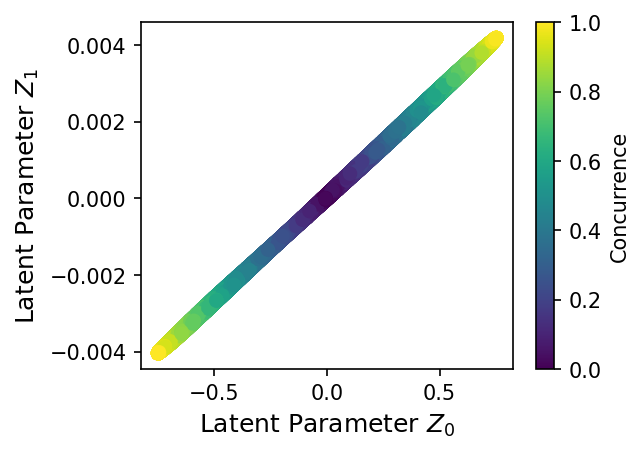

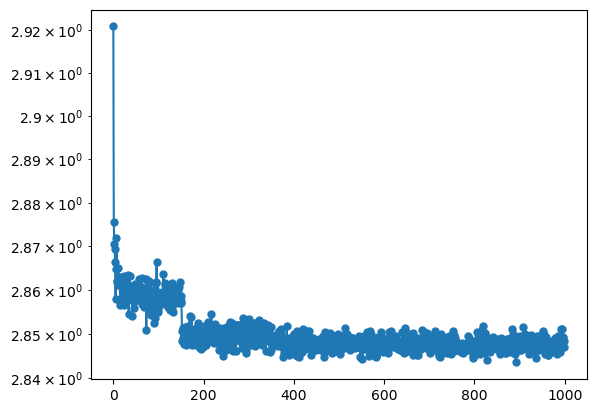

In [129]:
n_angle = 101
n_samples = 1000
beta = 0.75
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_noise_00.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)

concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/deco/encoder_deco00_lat2_beta75_noise.h5")
decoder.load_weights("/home/felix/Downloads/deco/decoder_deco00_lat2_beta75_noise.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

read_dictionary = np.load('/home/felix/Downloads/deco/history_deco00_lat2_beta75_noise.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noise 0.1 Deco 0.75 Beta

790/790 [==============================] - 0s 521us/step


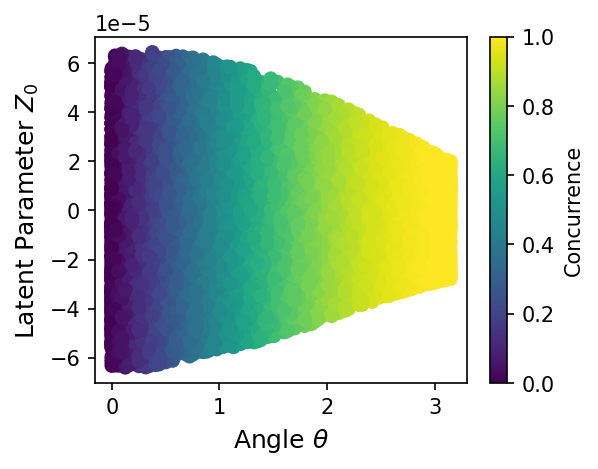

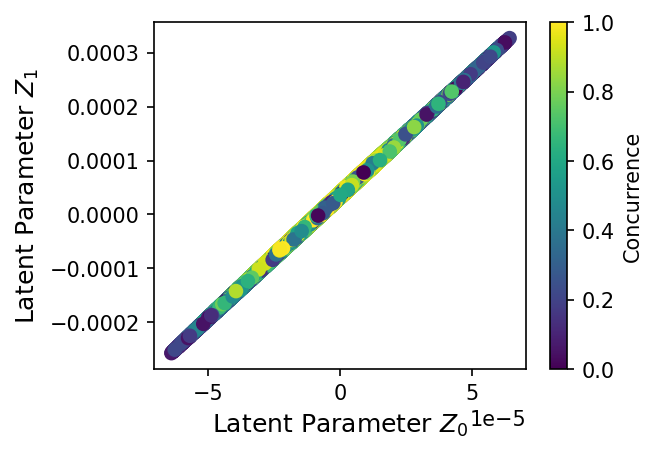

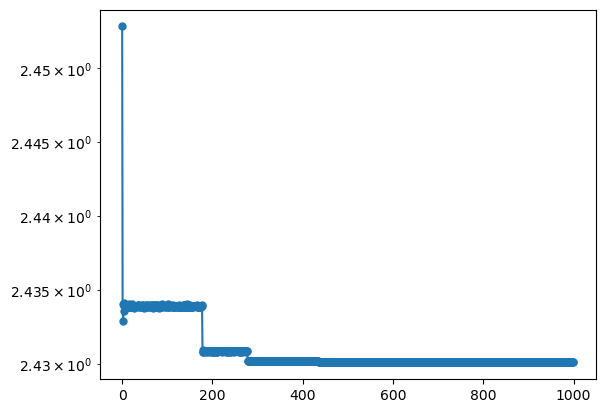

In [130]:
n_angle = 101
n_samples = 1000
beta = 0.75
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_noise_01.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)

concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/deco/encoder_deco01_lat2_beta75_noise.h5")
decoder.load_weights("/home/felix/Downloads/deco/decoder_deco01_lat2_beta75_noise.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

read_dictionary = np.load('/home/felix/Downloads/deco/history_deco01_lat2_beta75_noise.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noise 0.5 Deco 0.75 Beta

790/790 [==============================] - 0s 521us/step


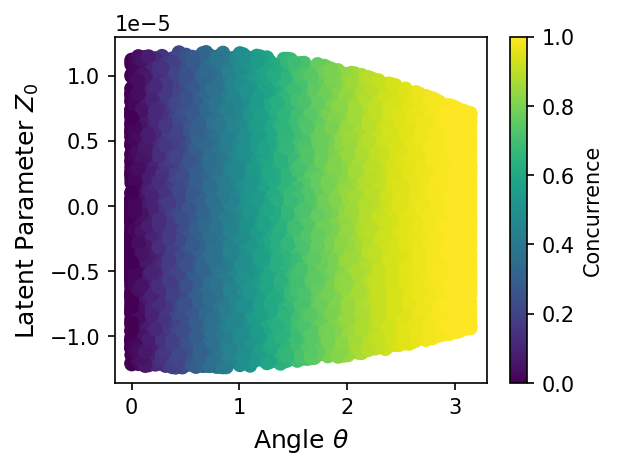

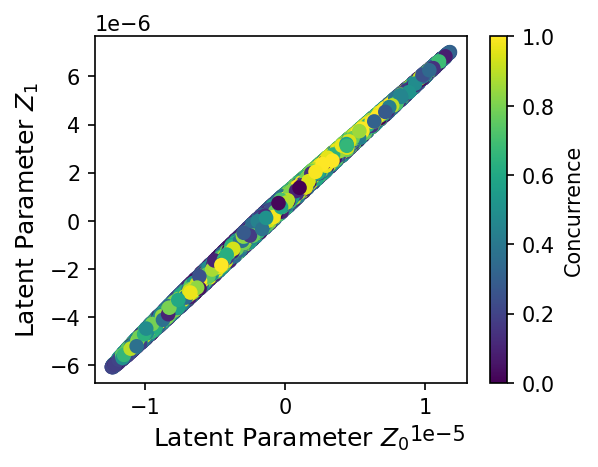

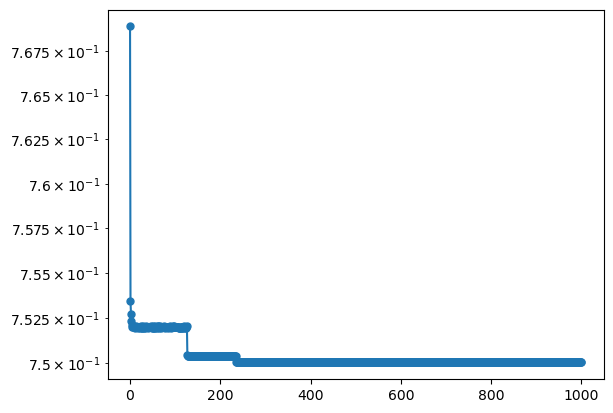

In [131]:
n_angle = 101
n_samples = 1000
beta = 0.75
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_noise_05.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)

concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/deco/encoder_deco05_lat2_beta75_noise.h5")
decoder.load_weights("/home/felix/Downloads/deco/decoder_deco05_lat2_beta75_noise.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

read_dictionary = np.load('/home/felix/Downloads/deco/history_deco05_lat2_beta75_noise.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")